In [31]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
import librosa.display
import IPython.display as ipd

In [33]:
for file in os.listdir('Male_Female_Pathological_Dataset/'):
    print(file)

101-a_n.wav
1037-a_n.wav
1038-a_n.wav
1039-a_n.wav
1040-a_n.wav
1041-a_n.wav
1042-a_n.wav
1043-a_n.wav
1044-a_n.wav
1045-a_n.wav
1046-a_n.wav
1047-a_n.wav
1048-a_n.wav
1049-a_n.wav
105-a_n.wav
1050-a_n.wav
1051-a_n.wav
1052-a_n.wav
1053-a_n.wav
1054-a_n.wav
1055-a_n.wav
1056-a_n.wav
1057-a_n.wav
1058-a_n.wav
106-a_n.wav
107-a_n.wav
108-a_n.wav
1083-a_n.wav
1084-a_n.wav
1085-a_n.wav
1086-a_n.wav
1087-a_n.wav
1088-a_n.wav
1089-a_n.wav
109-a_n.wav
1090-a_n.wav
110-a_n.wav
111-a_n.wav
1113-a_n.wav
1115-a_n.wav
1116-a_n.wav
1117-a_n.wav
1118-a_n.wav
1119-a_n.wav
1120-a_n.wav
1156-a_n.wav
1157-a_n.wav
1158-a_n.wav
1159-a_n.wav
1160-a_n.wav
1161-a_n.wav
1162-a_n.wav
1163-a_n.wav
1164-a_n.wav
1165-a_n.wav
1166-a_n.wav
118-a_n.wav
1186-a_n.wav
1187-a_n.wav
1188-a_n.wav
1189-a_n.wav
119-a_n.wav
1190-a_n.wav
1191-a_n.wav
1192-a_n.wav
1193-a_n.wav
1194-a_n.wav
1195-a_n.wav
1196-a_n.wav
1197-a_n.wav
1198-a_n.wav
1199-a_n.wav
120-a_n.wav
1200-a_n.wav
1201-a_n.wav
1202-a_n.wav
1203-a_n.wav
1204-a_n.w

In [34]:
filename = 'Male_Female_Pathological_Dataset/101-a_n.wav'

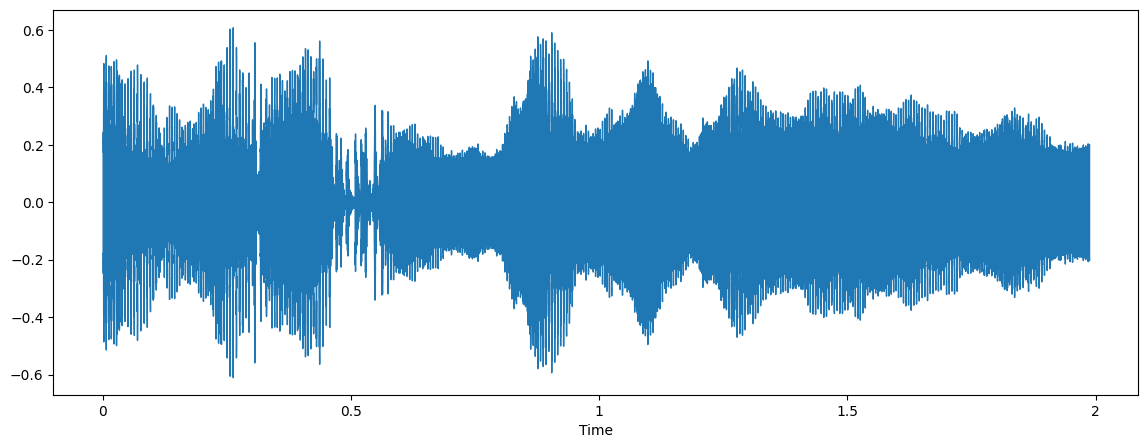

In [35]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr= sample_rate)
ipd.Audio(filename)

In [36]:
# !dir

In [38]:
data

array([0.10273299, 0.17389826, 0.17099631, ..., 0.1755839 , 0.17516023,
       0.14685161], dtype=float32)

In [9]:
data.shape

(43815,)

In [37]:
sample_rate

22050

In [41]:
time = data.shape[0]/sample_rate
time

1.9870748299319727

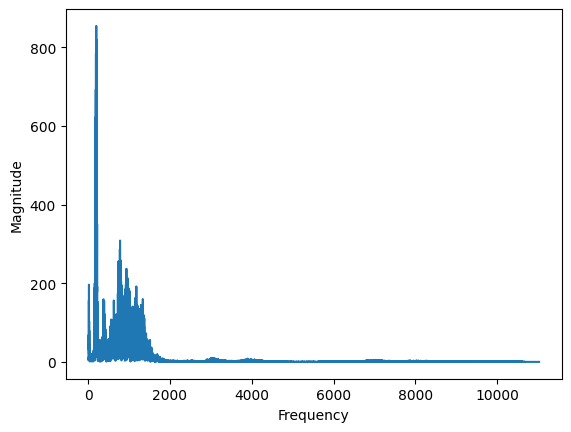

In [10]:
# Finding fft and converting it to spectrum
fft = np.fft.fft(data)
magnitude = np.abs(fft)
frequency = np.linspace(0, sample_rate, len(magnitude))
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [11]:
len(magnitude)/sample_rate

1.9870748299319727

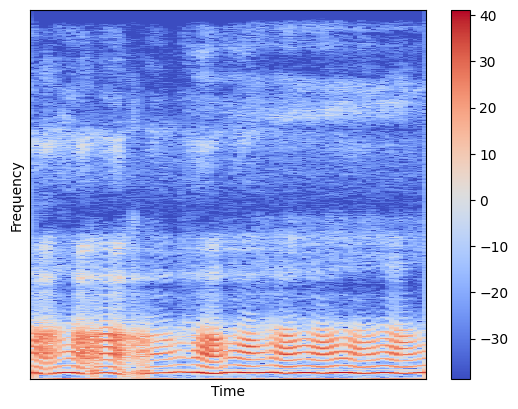

In [12]:
# Finding stft and converting it to spectogram
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(data, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time") 
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

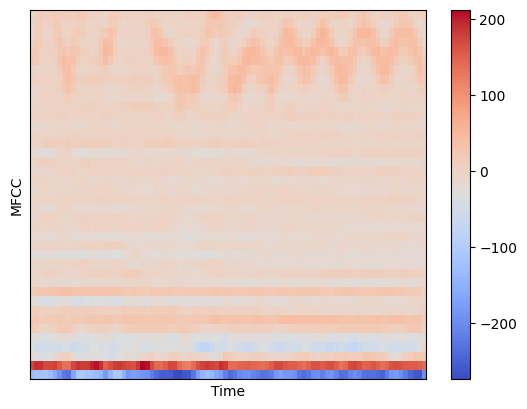

In [13]:
# Finding mfccs
mfccs_features = librosa.feature.mfcc(y=data, n_fft=n_fft, hop_length=hop_length, n_mfcc=40)

librosa.display.specshow(mfccs_features, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [14]:
mfccs_features

array([[-1.32828827e+02, -1.21913620e+02, -1.22375404e+02, ...,
        -2.57138885e+02, -2.62588043e+02, -1.98718628e+02],
       [ 1.73755905e+02,  1.91431839e+02,  1.87817505e+02, ...,
         1.53937683e+02,  1.50924988e+02,  1.40989532e+02],
       [-5.09344482e+00, -2.60296631e+01, -4.35233841e+01, ...,
         2.45120964e+01,  2.41494522e+01,  2.24073257e+01],
       ...,
       [-2.83003569e-01,  1.38153248e+01,  8.00831795e+00, ...,
         2.54229164e+01, -1.18451357e-01, -5.98764515e+00],
       [-8.91153240e+00,  7.85228395e+00,  1.39344273e+01, ...,
        -7.91912556e-01, -1.05161648e+01, -4.22266102e+00],
       [-4.62818670e+00,  6.14574194e+00,  2.00237389e+01, ...,
         5.47945082e-01,  2.46430635e+00,  5.56303215e+00]], dtype=float32)

## Reading Dataset

In [15]:
import pandas as pd

df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
0,1,n,w,20,Normal,Normal,1-a_n.wav
1,2,n,w,22,Normal,Normal,2-a_n.wav
2,3,n,w,23,Normal,Normal,3-a_n.wav
3,4,n,m,22,Normal,Normal,4-a_n.wav
4,5,n,m,22,Normal,Normal,5-a_n.wav
5,6,n,w,20,Normal,Normal,6-a_n.wav
6,7,n,w,19,Normal,Normal,7-a_n.wav
7,27,n,w,20,Normal,Normal,27-a_n.wav
8,17,n,w,19,Normal,Normal,17-a_n.wav
9,8,n,w,19,Normal,Normal,8-a_n.wav


In [16]:
df.shape

(1490, 7)

In [17]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

Audio
Type Gender       
n    m         259
     w         428
p    m         302
     w         501

<Axes: xlabel='Type,Gender'>

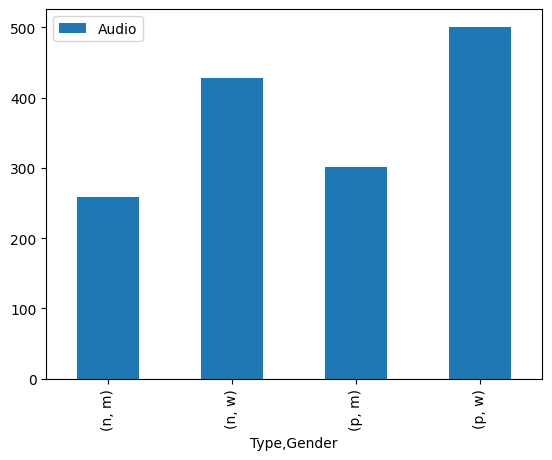

In [18]:
type_gender_count.plot.bar()

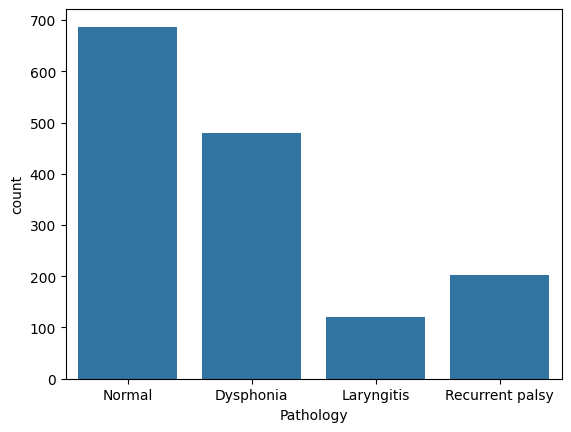

In [19]:
sns.countplot(x=df["Pathology"])
plt.show()

<Axes: xlabel='Type', ylabel='count'>

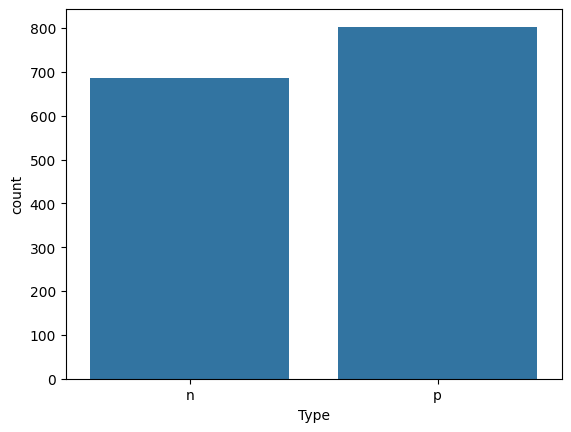

In [20]:
sns.countplot(x=df['Type'])

In [21]:
df["Age"].value_counts().sort_values(ascending= False).head(10)

Age
20    123
21     94
22     69
19     66
23     50
36     45
59     33
60     32
32     30
24     30
Name: count, dtype: int64

<Axes: ylabel='Density'>

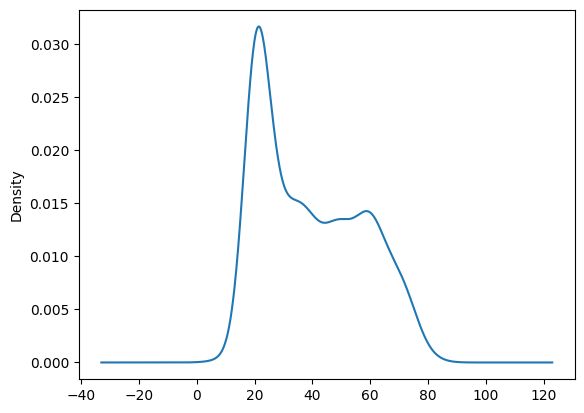

In [22]:
df["Age"].plot.kde()

## Extract Features

In [23]:
mfccs = librosa.feature.mfcc(y=data, sr= sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 86)


In [24]:
mfccs

array([[-1.32828827e+02, -1.21913620e+02, -1.22375404e+02, ...,
        -2.57138885e+02, -2.62588043e+02, -1.98718628e+02],
       [ 1.73755905e+02,  1.91431839e+02,  1.87817505e+02, ...,
         1.53937683e+02,  1.50924988e+02,  1.40989532e+02],
       [-5.09344482e+00, -2.60296631e+01, -4.35233841e+01, ...,
         2.45120964e+01,  2.41494522e+01,  2.24073257e+01],
       ...,
       [-2.83003569e-01,  1.38153248e+01,  8.00831795e+00, ...,
         2.54229164e+01, -1.18451357e-01, -5.98764515e+00],
       [-8.91153240e+00,  7.85228395e+00,  1.39344273e+01, ...,
        -7.91912556e-01, -1.05161648e+01, -4.22266102e+00],
       [-4.62818670e+00,  6.14574194e+00,  2.00237389e+01, ...,
         5.47945082e-01,  2.46430635e+00,  5.56303215e+00]], dtype=float32)

In [44]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
0,1,n,w,20,Normal,Normal,1-a_n.wav
1,2,n,w,22,Normal,Normal,2-a_n.wav
2,3,n,w,23,Normal,Normal,3-a_n.wav
3,4,n,m,22,Normal,Normal,4-a_n.wav
4,5,n,m,22,Normal,Normal,5-a_n.wav
5,6,n,w,20,Normal,Normal,6-a_n.wav
6,7,n,w,19,Normal,Normal,7-a_n.wav
7,27,n,w,20,Normal,Normal,27-a_n.wav
8,17,n,w,19,Normal,Normal,17-a_n.wav
9,8,n,w,19,Normal,Normal,8-a_n.wav


In [26]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [27]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Pathology"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

1490it [00:57, 25.76it/s]


In [28]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-226.80855, 66.601944, -27.219215, -42.401924...",Normal
1,"[-188.81018, 126.540054, -50.043312, -27.34525...",Normal
2,"[-145.98616, 103.1572, -49.026516, -36.57716, ...",Normal
3,"[-266.359, 190.43614, -26.060724, -20.608486, ...",Normal
4,"[-160.7685, 159.1807, -60.985, -4.4331656, -52...",Normal
5,"[-198.57973, 128.32462, -58.629547, -19.052362...",Normal
6,"[-194.94815, 114.29218, -72.05005, -22.18738, ...",Normal
7,"[-198.87387, 88.77395, -27.636099, -45.867283,...",Normal
8,"[-172.30714, 79.96792, -68.242, -28.008331, -1...",Normal
9,"[-187.83476, 108.06356, -36.689644, -39.47132,...",Normal


In [29]:
extracted_features_df.shape

(1490, 2)

In [30]:
extracted_features_df["feature"][0]

array([-2.2680855e+02,  6.6601944e+01, -2.7219215e+01, -4.2401924e+01,
       -3.2757679e+01, -3.2548424e+01,  2.7348593e+01, -7.9091034e+00,
       -2.4889082e+01,  1.5607006e+01, -7.5096226e+00, -6.3550291e+00,
       -1.9278319e+00, -1.5041244e+01, -2.3781923e+01, -3.0116611e+00,
       -1.2923190e+01,  5.6069808e+00, -8.4577837e+00, -7.0253768e+00,
        1.8298985e+00, -8.6728916e+00,  1.2941061e+00,  3.8609447e+01,
        2.6431135e+01,  5.9267078e+01,  3.3416401e+01,  7.8874259e+00,
       -4.1242623e+00, -6.0610557e+00, -1.9213481e-01,  4.6175323e+00,
        6.5926690e+00,  8.7423867e-01, -2.2634073e+01,  1.5810800e+00,
        4.0611057e+00,  2.1532400e+00, -1.2425359e+01, -5.2076735e+00],
      dtype=float32)

In [105]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [140]:
dummy_data

,Dysphonia,Laryngitis,Normal,Recurrent palsy
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1485,False,False,False,True
1486,False,False,False,True
1487,False,False,False,True
1488,False,False,False,True


In [133]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [134]:
x.shape

(1490,)

In [117]:
y.shape

(1490, 4)

In [118]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [119]:
x_train.shape

(1192, 40)

In [120]:
x_test.shape

(298, 40)

In [121]:
y_train.shape

(1192, 4)

In [122]:
y_test.shape

(298, 4)

## Model Training

In [123]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [125]:
## No. of classes
num_labels=y.shape[1]
num_labels

4

In [126]:
Dense(100,input_shape=(40,))

In [127]:
model=Sequential()
## first layer
model.add(Dense(512,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [128]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [129]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               20992     
                                                                 
 activation_8 (Activation)   (None, 512)               0         
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 activation_9 (Activation)   (None, 256)               0         
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [130]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=200
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/200
31/38 [=======================>......] - ETA: 0s - loss: 17.1969 - accuracy: 0.3337
Epoch 1: val_loss improved from inf to 1.25962, saving model to /audio_classification.hdf5
38/38 [==============================] - 2s 19ms/step - loss: 15.5307 - accuracy: 0.3289 - val_loss: 1.2596 - val_accuracy: 0.4564
Epoch 2/200
37/38 [============================>.] - ETA: 0s - loss: 4.7270 - accuracy: 0.3454

C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 1.25962
38/38 [==============================] - 0s 6ms/step - loss: 4.7325 - accuracy: 0.3448 - val_loss: 1.3639 - val_accuracy: 0.2819
Epoch 3/200
33/38 [=========================>....] - ETA: 0s - loss: 2.7181 - accuracy: 0.3580
Epoch 3: val_loss did not improve from 1.25962
38/38 [==============================] - 0s 10ms/step - loss: 2.6853 - accuracy: 0.3674 - val_loss: 1.3592 - val_accuracy: 0.5034
Epoch 4/200
28/38 [=====================>........] - ETA: 0s - loss: 2.1476 - accuracy: 0.3460
Epoch 4: val_loss did not improve from 1.25962
38/38 [==============================] - 0s 13ms/step - loss: 2.1233 - accuracy: 0.3574 - val_loss: 1.3642 - val_accuracy: 0.5034
Epoch 5/200
32/38 [========================>.....] - ETA: 0s - loss: 1.8166 - accuracy: 0.3604
Epoch 5: val_loss did not improve from 1.25962
38/38 [==============================] - 0s 7ms/step - loss: 1.7863 - accuracy: 0.3700 - val_loss: 1.3503 - val_accuracy: 0.5034
Epoch 6/

30/38 [======================>.......] - ETA: 0s - loss: 1.1866 - accuracy: 0.4563
Epoch 58: val_loss did not improve from 1.08322
38/38 [==============================] - 0s 7ms/step - loss: 1.1851 - accuracy: 0.4497 - val_loss: 1.1037 - val_accuracy: 0.5034
Epoch 59/200
33/38 [=========================>....] - ETA: 0s - loss: 1.1918 - accuracy: 0.4394
Epoch 59: val_loss did not improve from 1.08322
38/38 [==============================] - 0s 7ms/step - loss: 1.1778 - accuracy: 0.4480 - val_loss: 1.1042 - val_accuracy: 0.5034
Epoch 60/200
36/38 [===========================>..] - ETA: 0s - loss: 1.1816 - accuracy: 0.4540
Epoch 60: val_loss did not improve from 1.08322
38/38 [==============================] - 0s 8ms/step - loss: 1.1835 - accuracy: 0.4522 - val_loss: 1.0990 - val_accuracy: 0.5034
Epoch 61/200
28/38 [=====================>........] - ETA: 0s - loss: 1.1794 - accuracy: 0.4520
Epoch 61: val_loss did not improve from 1.08322
38/38 [==============================] - 0s 7ms/st

Epoch 117/200
37/38 [============================>.] - ETA: 0s - loss: 1.0830 - accuracy: 0.5144
Epoch 117: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 5ms/step - loss: 1.0849 - accuracy: 0.5134 - val_loss: 1.0377 - val_accuracy: 0.5772
Epoch 118/200
31/38 [=======================>......] - ETA: 0s - loss: 1.0864 - accuracy: 0.5192
Epoch 118: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 1.0900 - accuracy: 0.5151 - val_loss: 1.0644 - val_accuracy: 0.5436
Epoch 119/200
34/38 [=========================>....] - ETA: 0s - loss: 1.0940 - accuracy: 0.5294
Epoch 119: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 7ms/step - loss: 1.0998 - accuracy: 0.5285 - val_loss: 1.0392 - val_accuracy: 0.5738
Epoch 120/200
33/38 [=========================>....] - ETA: 0s - loss: 1.0853 - accuracy: 0.5312
Epoch 120: val_loss did not improve from 1.03621
38/38 [======================

Epoch 147/200
25/38 [==================>...........] - ETA: 0s - loss: 0.9858 - accuracy: 0.5813
Epoch 147: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 1.0183 - accuracy: 0.5738 - val_loss: 1.0931 - val_accuracy: 0.5369
Epoch 148/200
36/38 [===========================>..] - ETA: 0s - loss: 1.0092 - accuracy: 0.5573
Epoch 148: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 1.0124 - accuracy: 0.5570 - val_loss: 1.0794 - val_accuracy: 0.5369
Epoch 149/200
38/38 [==============================] - ETA: 0s - loss: 1.0072 - accuracy: 0.5730
Epoch 149: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 1.0072 - accuracy: 0.5730 - val_loss: 1.1377 - val_accuracy: 0.5671
Epoch 150/200
28/38 [=====================>........] - ETA: 0s - loss: 1.0168 - accuracy: 0.5748
Epoch 150: val_loss did not improve from 1.03621
38/38 [======================

Epoch 177/200
34/38 [=========================>....] - ETA: 0s - loss: 0.9119 - accuracy: 0.6167
Epoch 177: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 0.9199 - accuracy: 0.6107 - val_loss: 1.2093 - val_accuracy: 0.5168
Epoch 178/200
36/38 [===========================>..] - ETA: 0s - loss: 0.8917 - accuracy: 0.6155
Epoch 178: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 6ms/step - loss: 0.8905 - accuracy: 0.6166 - val_loss: 1.2858 - val_accuracy: 0.5537
Epoch 179/200
35/38 [==========================>...] - ETA: 0s - loss: 0.8783 - accuracy: 0.6107
Epoch 179: val_loss did not improve from 1.03621
38/38 [==============================] - 0s 7ms/step - loss: 0.8809 - accuracy: 0.6099 - val_loss: 1.1900 - val_accuracy: 0.5201
Epoch 180/200
34/38 [=========================>....] - ETA: 0s - loss: 0.8870 - accuracy: 0.6057
Epoch 180: val_loss did not improve from 1.03621
38/38 [======================

In [131]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.5469798445701599


## Model Evaluation

In [57]:
filename = 'Audio_Dataset/101-a_n.wav'

In [58]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [59]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-162.543716,110.783356,-59.043091,-12.812584,-29.095034,-5.564352,12.659228,-1.032365,-12.094978,12.189472,...,44.499577,42.928101,19.451494,6.891273,-7.665397,-3.514187,8.894487,5.748455,-0.125796,-9.048126


In [60]:
features = np.array(feature_df.values.tolist())

In [61]:
features.shape

(1, 40)

In [62]:
model.predict(features)

1/1 [==============================] - 0s 136ms/step


array([[0.12450135, 0.00217675, 0.87030536, 0.00301663]], dtype=float32)